In [1]:
import requests
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
Capt1=pd.read_csv('../Selected/A8032A31204E.csv')
Capt2=pd.read_csv('../Selected/A8032A311FAA.csv')
Capt3=pd.read_csv('../Selected/C45BBE37B346.csv')
Capt4=pd.read_csv('../Selected/C45BBE39F9AE.csv')
Capt6=pd.read_csv('../Selected/C45BBE39F56A.csv')
Capt7=pd.read_csv('../Selected/C45BBE384CD2.csv')
Capt9=pd.read_csv('../Selected/C45BBE386362.csv')
Capt10=pd.read_csv('../Selected/C45BBE386952.csv')

List_Capt=[Capt1,Capt2,Capt3,Capt4,Capt6,Capt7,Capt9,Capt10]
#liste_df <- split(df, df$ID)

In [3]:
list_capteurs = ['C45BBE384CD2', 'C45BBE386362', 'C45BBE386952', 'C45BBE39F56A', 'C45BBE39F9AE', 'A8032A31204E', 'C45BBE37B346']
list_capteurs_dist = {'C45BBE384CD2' : 89, 'C45BBE386362' : 80, 'C45BBE386952' : 65, 'C45BBE39F56A' : 56, 'C45BBE39F9AE' : 13, 'A8032A31204E' : 29, 'C45BBE37B346' : 52}

In [4]:
def list_duplicates(seq):
  seen = set()
  seen_add = seen.add
  seen_twice = set(x for x in seq if x in seen or seen_add(x))
  return list(seen_twice)

In [5]:
# comparaison du rssi trouvé par capteur par rapport à l'ensemble

def position3(differents_rssi, nb_capt):
    L=[[]]*8
    for i, capt in enumerate(list_capteurs):
        df = pd.read_csv('../Selected/'+capt+'.csv')
        for col in df.columns:
            df2=pd.DataFrame(df[col])
            for index, row in df2.iterrows():
                if row[0] == differents_rssi[capt]:
                    L[i].append(int(col))
    if nb_capt == 1:
        liste = max((x) for x in L)
        if liste == []:
            return 0
        return sum(liste)/len(liste)
    Bool = True
    while Bool:
        intersection = L[0]
        for i in range(1, len(L)):
            set1 = set(L[i])
            set2 = set(intersection)
            intersection = list(set1 & set2)
        if intersection != []:
            Bool = False
            return sum(intersection)/len(intersection)
        else:
            return position3(differents_rssi, nb_capt-1)

    # if list_duplicates(L)!=[]:
    #     return sum(list_duplicates(L)) / len(list_duplicates(L))
    # elif L!=[]:
    #     return sum(L)/len(L)
    # else:
    #     return 0

In [6]:
position3({'C45BBE384CD2' : -75, 'C45BBE386362' : -80, 'C45BBE386952' : -65, 'C45BBE39F56A' : 0, 'C45BBE39F9AE' : 0, 'A8032A31204E' : 0, 'C45BBE37B346' : 0, 'A8032A311FAA' : 0}, 2)

73.88

In [7]:
df = pd.read_csv('../tableau_brute.csv')
df2 = df.loc[df['metre'] == 30]
df3 = df2.groupby('macModule')['rssi'].mean()
df4 = pd.DataFrame(df3)
df4

,rssi
macModule,
A8032A31204E,-62.833333
C45BBE37B346,-80.000000


In [8]:
# estimation pour chaque mètre

def generer_rssi_max(m):
    L = {'C45BBE384CD2' : 0, 'C45BBE386362' : 0, 'C45BBE386952' : 0, 'C45BBE39F56A' : 0, 'C45BBE39F9AE' : 0, 'A8032A31204E' : 0, 'C45BBE37B346' : 0, 'A8032A311FAA' : 0}
    df = pd.read_csv('../tableau_brute.csv')
    df1 = pd.read_csv('../gr23_data.csv')
    df1 = df1[['timestamp', 'macModule', 'rssi', 'metre']]
    df = pd.concat([df, df1], ignore_index=True)
    df = df.fillna(-100.0)
    df2 = df.loc[df['metre'] == m]
    df3 = pd.DataFrame(df2.groupby('macModule')['rssi'].max())
    for capt in df3.index:
        if capt not in list_capteurs:
            continue
        L[capt] = df3['rssi'][capt]
    return L

In [9]:
# estimation pour chaque mètre

def generer_rssi_mean(m):
    L = {'C45BBE384CD2' : 0, 'C45BBE386362' : 0, 'C45BBE386952' : 0, 'C45BBE39F56A' : 0, 'C45BBE39F9AE' : 0, 'A8032A31204E' : 0, 'C45BBE37B346' : 0, 'A8032A311FAA' : 0}
    df = pd.read_csv('../tableau_brute.csv')
    df1 = pd.read_csv('../gr23_data.csv')
    df1 = df1[['timestamp', 'macModule', 'rssi', 'metre']]
    df = pd.concat([df, df1], ignore_index=True)
    df = df.fillna(-100.0)
    df2 = df.loc[df['metre'] == m]
    df3 = pd.DataFrame(df2.groupby('macModule')['rssi'].mean())
    for capt in df3.index:
        if capt not in list_capteurs:
            continue
        L[capt] = df3['rssi'][capt]
    return L

In [10]:
generer_rssi_max(43)

{'C45BBE384CD2': 0,
 'C45BBE386362': 0,
 'C45BBE386952': 0,
 'C45BBE39F56A': 0,
 'C45BBE39F9AE': 0,
 'A8032A31204E': -72.0,
 'C45BBE37B346': 0,
 'A8032A311FAA': 0}

In [11]:
generer_rssi_mean(45)

{'C45BBE384CD2': 0,
 'C45BBE386362': 0,
 'C45BBE386952': 0,
 'C45BBE39F56A': -80.0,
 'C45BBE39F9AE': 0,
 'A8032A31204E': -76.05555555555556,
 'C45BBE37B346': 0,
 'A8032A311FAA': 0}

In [12]:
X=[]
for i in range(91):
    X.append(position3(generer_rssi_max(i), 1))

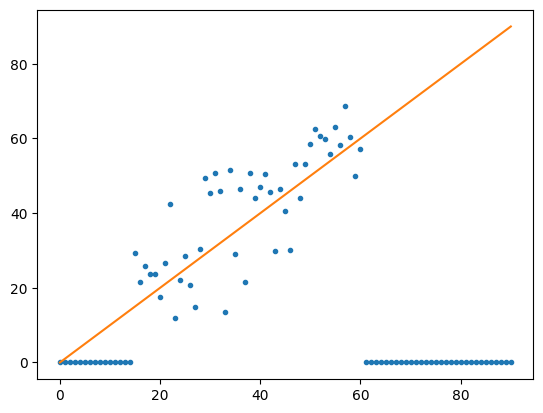

In [13]:
plt.plot(X, '.')
plt.plot([i for i in range(91)])

In [14]:
X=[]
for i in range(91):
    X.append(position3(generer_rssi_mean(i), 1))

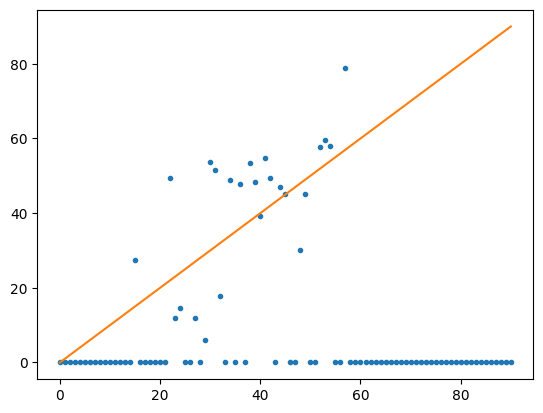

In [15]:
plt.plot(X, '.')
plt.plot([i for i in range(91)])

## MAXIMUM

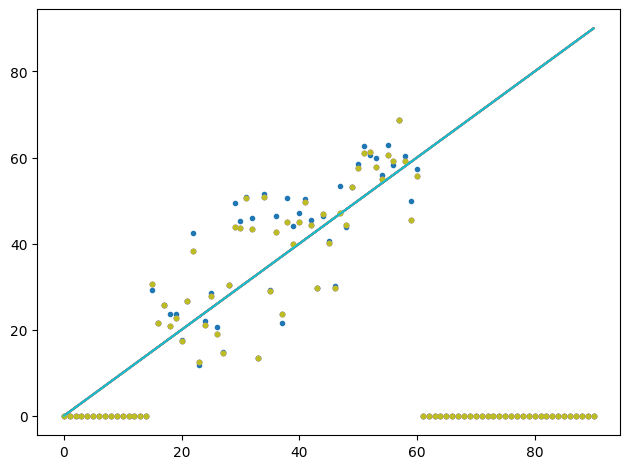

In [16]:
for j in range(1,6):
    X=[]
    for i in range(91):
        X.append(position3(generer_rssi_max(i), j))
    plt.plot(X, '.')
    plt.plot([i for i in range(91)])
    plt.tight_layout()

## MOYENNE

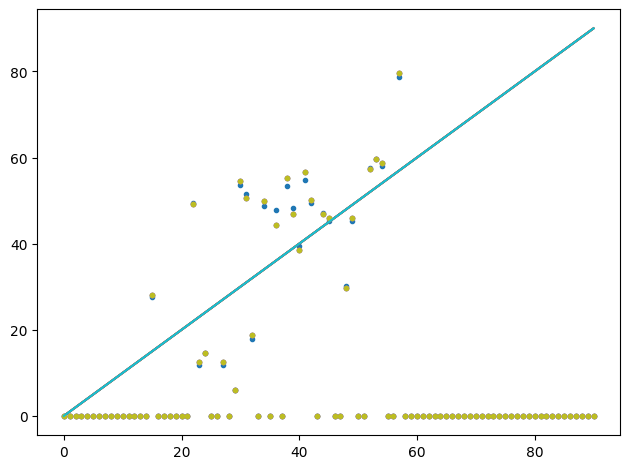

In [17]:
for j in range(1, 6):
    X=[]
    for i in range(91):
        X.append(position3(generer_rssi_mean(i), j))
    plt.plot(X, '.')
    plt.plot([i for i in range(91)])
    plt.tight_layout()

## Régression linéaire

In [18]:
import statsmodels.api as sm
plt.rcParams['figure.figsize'] = (12, 6)

In [19]:
y=[]
for i in range(15, 61):
    y.append(position3(generer_rssi_max(i), 2))

In [20]:
x = [i for i in range(15, 61)]

In [21]:
import numpy as np

In [22]:
X = np.column_stack((x))
X=X.transpose()
X = sm.add_constant(X)
model = sm.OLS(y,X)
results = model.fit()

Text(0, 0.5, 'position estimée')

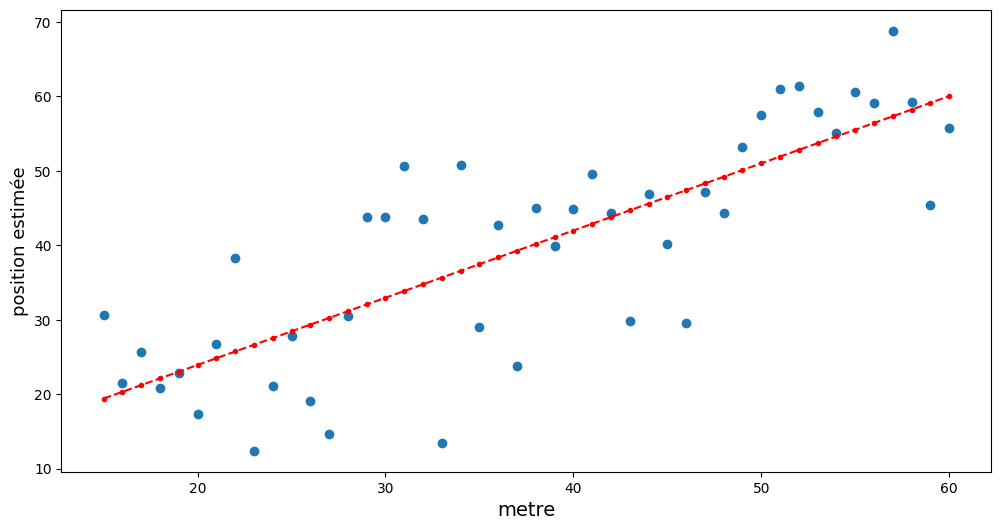

In [23]:
plt.plot(x, y, 'o', label="données")
plt.plot(x, results.fittedvalues, 'r--.', label="droite de régression")
plt.xlabel("metre",fontsize=14); 
plt.ylabel('position estimée',fontsize=13)

In [24]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.631
Model:                            OLS   Adj. R-squared:                  0.622
Method:                 Least Squares   F-statistic:                     75.08
Date:                Thu, 05 Jan 2023   Prob (F-statistic):           4.57e-11
Time:                        22:34:02   Log-Likelihood:                -167.22
No. Observations:                  46   AIC:                             338.4
Df Residuals:                      44   BIC:                             342.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.8884      4.144      1.421      0.1

In [25]:
print('Paramètres de la régression: ', results.params)
print('R2: ', results.rsquared)
print('s: ', np.sqrt(results.mse_resid))
print('intervalles de confiance b0 95% : ', results.conf_int(.05)[0])
print('intervalles de confiance b1 95% : ', results.conf_int(.05)[1])

Paramètres de la régression:  [5.88835831 0.90256565]
R2:  0.6305149959380739
s:  9.378786337390455
intervalles de confiance b0 95% :  [-2.46246488 14.2391815 ]
intervalles de confiance b1 95% :  [0.69264391 1.1124874 ]


$b_0$ devrait être égal à 0, il vaut 5.89 avec un intervalle de confiance de [-2.5; 14.2]

$b_1$ devrait être égal à 1, il vaut 0.91 avec un intervalle de confiance de [0.7; 1.1]

# Faible biais mais variance importante !